In [1]:
%pylab inline
%matplotlib inline
import pandas as pd
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
print pd.version.short_version
print sklearn.__version__

0.15.2
0.15.2


# Restaurant Revenue Prediction

## ---- A Kaggle Competition

In this notebook, we'll try to tackle a Kaggle problem. The object is to predict annual restaurant sales based on objective measurements.

This is an interesting problem to me because it's set up in a classic regression setting. So all classic regression techniques should be applicable to the problem. The trick though, as like all machine learning problem, is to carefully test the various models and select the most generalizable one.

## Competition Description

With over 1,200 quick service restaurants across the globe, TFI is the company behind some of the world's most well-known brands: Burger King, Sbarro, Popeyes, Usta Donerci, and Arby’s. They employ over 20,000 people in Europe and Asia and make significant daily investments in developing new restaurant sites.

Right now, deciding when and where to open new restaurants is largely a subjective process based on the personal judgement and experience of development teams. This subjective data is difficult to accurately extrapolate across geographies and cultures. 

New restaurant sites take large investments of time and capital to get up and running. When the wrong location for a restaurant brand is chosen, the site closes within 18 months and operating losses are incurred. 

Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow TFI to invest more in other important business areas, like sustainability, innovation, and training for new employees. Using demographic, real estate, and commercial data, this competition challenges you to predict the annual restaurant sales of 100,000 regional locations.

#Data Exploration

In [3]:
train_df = pd.read_csv('train.csv', parse_dates=[1])
#print train_df.head(n=5)

In [4]:
train_df.City = train_df.City.astype('category')
train_df.Type = train_df.Type.astype('category')
train_df['City Group'] = train_df['City Group'].astype('category')

In [21]:
#train_df.dtypes

Id                     int64
Open Date     datetime64[ns]
City                category
City Group          category
Type                category
P1                     int64
P2                   float64
P3                   float64
P4                   float64
P5                     int64
P6                     int64
P7                     int64
P8                     int64
P9                     int64
P10                    int64
P11                    int64
P12                    int64
P13                  float64
P14                    int64
P15                    int64
P16                    int64
P17                    int64
P18                    int64
P19                    int64
P20                    int64
P21                    int64
P22                    int64
P23                    int64
P24                    int64
P25                    int64
P26                  float64
P27                  float64
P28                  float64
P29                  float64
P30           

In [5]:
#d = train_df['Open Date']
#d.map( lambda x : x.year )
train_df['Open_Year'] = train_df['Open Date'].map( lambda x : x.year)
train_df['Open_Month'] = train_df['Open Date'].map( lambda x : x.month)
print train_df.head()

   Id  Open Date        City  City Group Type  P1   P2  P3  P4  P5  \
0   0 1999-07-17    İstanbul  Big Cities   IL   4  5.0   4   4   2   
1   1 2008-02-14      Ankara  Big Cities   FC   4  5.0   4   4   1   
2   2 2013-03-09  Diyarbakır       Other   IL   2  4.0   2   5   2   
3   3 2012-02-02       Tokat       Other   IL   6  4.5   6   6   4   
4   4 2009-05-09   Gaziantep       Other   IL   3  4.0   3   4   2   

      ...      P31  P32  P33  P34  P35  P36  P37  revenue  Open_Year  \
0     ...        3    4    5    5    4    3    4  5653753       1999   
1     ...        0    0    0    0    0    0    0  6923131       2008   
2     ...        0    0    0    0    0    0    0  2055379       2013   
3     ...       12   10    6   18   12   12    6  2675511       2012   
4     ...        1    3    2    3    4    3    3  4316715       2009   

   Open_Month  
0           7  
1           2  
2           3  
3           2  
4           5  

[5 rows x 45 columns]


In [6]:
train_df['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

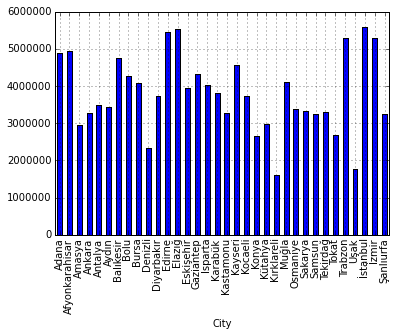

In [7]:
train_df_grouped_by_city = train_df.groupby(by='City')
city_avg = train_df_grouped_by_city.revenue.aggregate(np.average)
city_avg.plot(kind='bar')

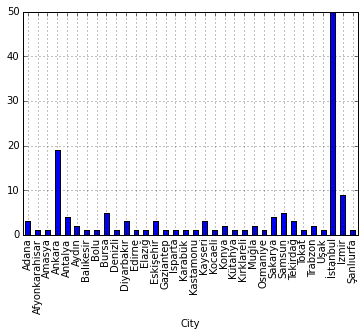

In [8]:
train_df_grouped_by_city = train_df.groupby(by='City')
city_count = train_df_grouped_by_city.revenue.aggregate(np.count_nonzero)
#print city_count
city_count.plot(kind='bar')

City Group
Big Cities    4983480.076923
Other         3752924.101695
Name: revenue, dtype: float64
City Group            
Big Cities  İstanbul      50
            Ankara        19
            İzmir          9
            Bursa          0
            Gaziantep      0
            Eskişehir      0
            Elazığ         0
            Edirne         0
            Diyarbakır     0
            Denizli        0
            Şanlıurfa      0
            Isparta        0
            Balıkesir      0
            Aydın          0
            Antalya        0
...
Other       Elazığ        1
            Şanlıurfa     1
            Gaziantep     1
            Isparta       1
            Kastamonu     1
            Kocaeli       1
            Kütahya       1
            Kırklareli    1
            Osmaniye      1
            Tokat         1
            Uşak          1
            Karabük       1
            İzmir         0
            Ankara        0
            İstanbul      0
Length: 68, dtype: 

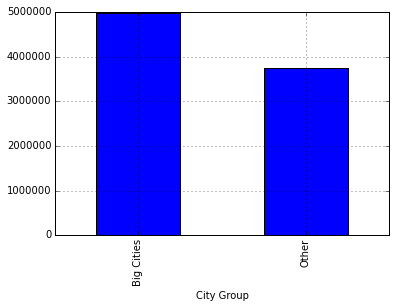

In [9]:
train_df_grouped_by_city_group = train_df.groupby(by='City Group')
city_group_avg = train_df_grouped_by_city_group.revenue.aggregate(np.average)
print city_group_avg
print train_df_grouped_by_city_group.City.value_counts()
city_group_avg.plot(kind='bar')

Open_Year      
1996       1996     1
1997       1997     1
1998       1998     4
1999       1999     4
2000       2000     2
2002       2002     2
2004       2004     3
2005       2005     4
2006       2006     7
2007       2007     7
2008       2008    14
2009       2009    16
2010       2010    15
2011       2011    25
2012       2012    18
2013       2013    12
2014       2014     2
dtype: int64


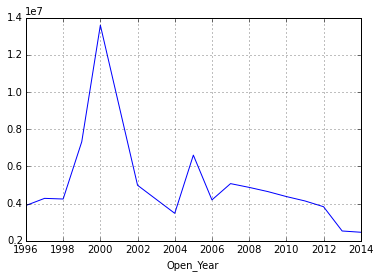

In [25]:
train_df_grouped_by_year = train_df.groupby(by='Open_Year')
year_avg = train_df_grouped_by_year.revenue.aggregate(np.average)
print train_df_grouped_by_year.Open_Year.value_counts()
year_avg.plot(kind='line')

In [11]:
print train_df[ train_df.Open_Year == 2000 ]

    Id  Open Date      City  City Group Type  P1  P2  P3  P4  P5     ...      \
16  16 2000-01-07  İstanbul  Big Cities   FC   3   5   4   4   2     ...       
85  85 2000-01-07  İstanbul  Big Cities   FC   3   5   4   4   2     ...       

    P31  P32  P33  P34  P35  P36  P37   revenue  Open_Year  Open_Month  
16    0    0    0    0    0    0    0  19696939       2000           1  
85    0    0    0    0    0    0    0   7495092       2000           1  

[2 rows x 45 columns]


In [18]:
print train_df.iloc[[16, 85]]['P29']

16    2
85    3
Name: P29, dtype: float64


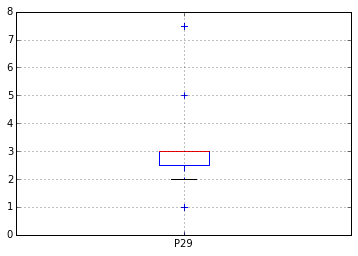

In [19]:
train_df.P29.plot(kind='box')

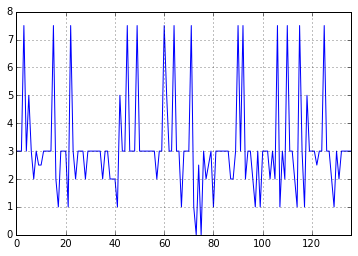

In [22]:
train_df.P29.plot()

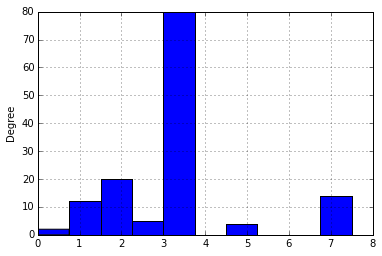

In [23]:
train_df.P29.plot(kind='hist')

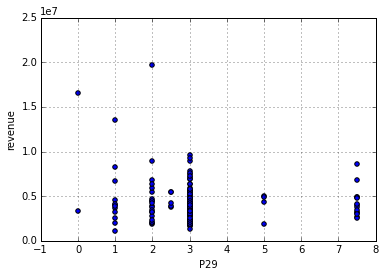

In [27]:
train_df.plot(x='P29', y='revenue', kind='scatter')

**Now this is a very interesting observation. Record 16 and 85 are identical in predictors(EXCEPT FOR ...) but give very different revenue amounts**

The question we face here is, do we want to exclude the outlier or do we want to include it?

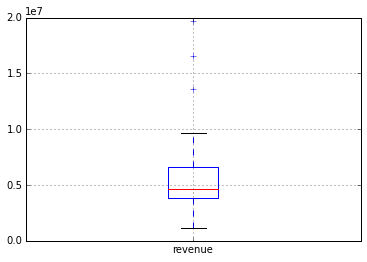

In [44]:
train_df[ train_df.City == 'İstanbul' ].revenue.plot('box')

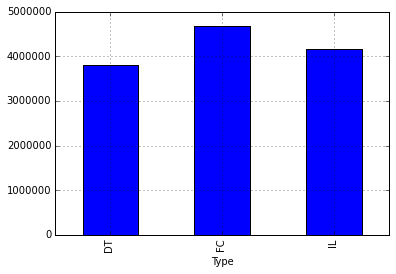

In [35]:
train_df_grouped_by_type = train_df.groupby(by='Type')
type_avg = train_df_grouped_by_type.revenue.aggregate(np.average)
type_avg.plot(kind='bar')

In [7]:
trainingdf = pd.read_csv('train.csv')
print trainingdf.columns

Index([u'Id', u'Open Date', u'City', u'City Group', u'Type', u'P1', u'P2', u'P3', u'P4', u'P5', u'P6', u'P7', u'P8', u'P9', u'P10', u'P11', u'P12', u'P13', u'P14', u'P15', u'P16', u'P17', u'P18', u'P19', u'P20', u'P21', u'P22', u'P23', u'P24', u'P25', u'P26', u'P27', u'P28', u'P29', u'P30', u'P31', u'P32', u'P33', u'P34', u'P35', u'P36', u'P37', u'revenue'], dtype='object')


convert date strings to days from the first restaurant opened

In [8]:
import datetime
opendate = trainingdf['Open Date']
dates = [datetime.datetime.strptime(date, '%m/%d/%Y') for date in opendate]
mindate = min(dates)
ageByDays = [(item-mindate).days for item in dates]
print ageByDays[:10]

[1165, 4299, 6149, 5748, 4749, 5028, 5269, 5522, 5225, 5670]


convert string categories to integer categories

In [9]:
import numpy as np
city = trainingdf['City']
b,c = np.unique(city, return_inverse=True)
print c[:10]
citygroup = trainingdf['City Group']
b,citygroupcat = np.unique(citygroup, return_inverse=True)
print citygroupcat[:10]
t = trainingdf['Type']
b,tcat = np.unique(t, return_inverse=True)
print tcat[:10]

[31  3 10 28 14  3 31 31  1 11]
[0 0 1 1 1 0 0 0 1 1]
[2 1 2 2 2 1 2 2 2 2]


In [11]:
trainingdf['Open Date'] = ageByDays
trainingdf['City'] = c
trainingdf['City Group'] = citygroupcat
trainingdf['Type'] = tcat
X_train = trainingdf[trainingdf.columns[1:-1]]
y_train = trainingdf['revenue']
print X_train.head()

   Open Date  City  City Group  Type  P1   P2  P3  P4  P5  P6 ...   P28  P29  \
0       1165    31           0     2   4  5.0   4   4   2   2 ...   2.0  3.0   
1       4299     3           0     1   4  5.0   4   4   1   2 ...   3.0  3.0   
2       6149    10           1     2   2  4.0   2   5   2   3 ...   1.0  3.0   
3       5748    28           1     2   6  4.5   6   6   4   4 ...   2.5  7.5   
4       4749    14           1     2   3  4.0   3   4   2   2 ...   1.0  3.0   

   P30  P31  P32  P33  P34  P35  P36  P37  
0    5    3    4    5    5    4    3    4  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0  
3   25   12   10    6   18   12   12    6  
4    5    1    3    2    3    4    3    3  

[5 rows x 41 columns]


#Remove Duplicates

In [6]:
train_df_without_id = pd.read_csv('train.csv', parse_dates=[1], index_col=0)
print train_df_without_id

     Open Date            City  City Group Type  P1   P2   P3   P4  P5  P6  \
Id                                                                           
0   1999-07-17        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2   
1   2008-02-14          Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2   
2   2013-03-09      Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3   
3   2012-02-02           Tokat       Other   IL   6  4.5  6.0  6.0   4   4   
4   2009-05-09       Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2   
5   2010-02-12          Ankara  Big Cities   FC   6  6.0  4.5  7.5   8  10   
6   2010-10-11        İstanbul  Big Cities   IL   2  3.0  4.0  4.0   1   5   
7   2011-06-21        İstanbul  Big Cities   IL   4  5.0  4.0  5.0   2   3   
8   2010-08-28  Afyonkarahisar       Other   IL   1  1.0  4.0  4.0   1   2   
9   2011-11-16          Edirne       Other   IL   6  4.5  6.0  7.5   6   4   
10  2013-08-09         Kocaeli       Other   FC   9  6.0  6.0  6

In [12]:
train_df_without_id_revenue = train_df_without_id.drop('revenue', axis=1)
print train_df_without_id_revenue.shape

(137, 41)


In [11]:
train_df_without_id_revenue_unique = train_df_without_id_revenue.drop_duplicates()
print train_df_without_id_revenue_unique.shape

(137, 41)


In [28]:
two_row = train_df_without_id_revenue.iloc[[16,85],:]
p_list = ['P' + str(i + 1) for i in xrange(37)]
print two_row.drop_duplicates(subset=['Open Date', 'City', 'Type'] + p_list)

    Open Date      City  City Group Type  P1  P2  P3  P4  P5  P6 ...   P28  \
Id                                                               ...         
16 2000-01-07  İstanbul  Big Cities   FC   3   5   4   4   2   5 ...     2   
85 2000-01-07  İstanbul  Big Cities   FC   3   5   4   4   2   5 ...     2   

    P29  P30  P31  P32  P33  P34  P35  P36  P37  
Id                                               
16    2    0    0    0    0    0    0    0    0  
85    3    0    0    0    0    0    0    0    0  

[2 rows x 41 columns]


Shit... They are **de

#First cut, linear regression

In [17]:
from sklearn import linear_model

In [18]:
lin_reg = linear_model.LinearRegression()

In [19]:
lin_reg_fit = lin_reg.fit(X_train, y_train)

In [25]:
in_sample_diff = (lin_reg_fit.predict(X_train) - y_train)

In [27]:
in_sample_diff2 = in_sample_diff.map(lambda x : x * x)

In [28]:
np.sqrt(in_sample_diff2.mean())

2016291.4366972668

# forward stepwise selection
select five features using forward stepwise selection with highest linear regression r square 
TODO:
note that some of the variables are categorical and should add dummy variable to do that.

In [12]:
from sklearn.linear_model import LinearRegression
k = 5
features = []
columns = list(X_train.columns)
for i in range(k):
    rSquare = []
    for j in range(len(columns)):
        model = LinearRegression()
        X = X_train[X_train.columns[j]]
        f = pd.DataFrame(X_train, columns=features)
        f['newX'] = X
        model.fit(f, y_train)
        rscore = model.score(f, y_train)
        rSquare.append(rscore)
    feature = X_train.columns[np.argmax(map(abs,rSquare))]
    features.append(feature)
    columns.remove(feature)
print features

['Open Date', 'City', 'Type', 'City Group', 'P29']


# simple regression on Open Date

In [13]:
import statsmodels.formula.api as sm
df = pd.DataFrame({'y':y_train, 'x':X_train['Open Date']})
result = sm.ols(formula="y ~ x", data = df).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     16.03
Date:                Sat, 28 Mar 2015   Prob (F-statistic):           0.000102
Time:                        05:20:53   Log-Likelihood:                -2208.6
No. Observations:                 137   AIC:                             4421.
Df Residuals:                     135   BIC:                             4427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.135e+06   7.02e+05     10.171      0.0

In [14]:
import matplotlib.pyplot as plt
model = LinearRegression()
X = standardize(X_train[feature1])
model.fit(X, standardize(y_train))
predy = model.predict(X) * y_train.std() + y_train.mean()
plt.scatter(X_train['Open Date'], y_train, color='black')
plt.plot(X_train['Open Date'], predy, color='blue', linewidth=3)
plt.title('regress revenue on opendate')
plt.xlabel('open date diff first open date')
plt.ylabel('revenue')

NameError: name 'standardize' is not defined

# factor analysis on Ps
-- regress revenue on three factor loadings of P1 to P37
the result looks pretty sad, because a simple regression on P2 would give a r square of 0.037,
three factors decrease the r square, the adjusted r square even go negative...

In [15]:
from sklearn.decomposition.pca import PCA
import statsmodels.formula.api as sm

pcolumns = ['P'+str(i) for i in range(1,38)]
X_P = pd.DataFrame(X_train, columns=pcolumns)
pca = PCA(n_components=3)
train_xp = pca.fit_transform(X_P)
print 'the explained variance ratio of pca is ', pca.explained_variance_ratio_
df = pd.DataFrame({'y':y_train, 'x1':train_xp[:,0], 'x2':train_xp[:,1], 'x3':train_xp[:,2]})
result = sm.ols(formula='y~x1+x2+x3',data=df).fit()
print result.summary()

the explained variance ratio of pca is  [ 0.6595424   0.16746509  0.0321976 ]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6551
Date:                Sat, 28 Mar 2015   Prob (F-statistic):              0.581
Time:                        05:21:23   Log-Likelihood:                -2215.3
No. Observations:                 137   AIC:                             4439.
Df Residuals:                     133   BIC:                             4450.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------

In [ ]:
# todo
# looks like P1-P37 can be represented by two or three variables by PCA
# and also column City has 37 categories, which also need to be classfied into two or three categories, 
# so that there are not so much dummy variables to be added
# select five features by forward stepwise selection(aic? bic? adjusted r square?)

feature selection in scikit learn package

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, 5)
rfe = rfe.fit(X_train, y_train)
print rfe.support_
print rfe.ranking_

[False False False  True False False False False False  True False  True
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
[37 28 29  1 17  8 25 11 26  1 36  1  1 21 15 22  1 16 19  5  4  6 24  9 14
 12 23  2 10  3 34  7 27 33 30 18 32 35 31 13 20]


Type, P6, P8, P9, P13